# Power Transformer

### In machine learning, especially in the context of data preprocessing, the Power Transformer is a technique used to make data more Gaussian-like (normal distribution). It stabilizes variance, minimizes skewness, and makes data more suitable for models that assume normality. The transformation is applied to features or datasets that do not follow a normal distribution, which is often beneficial for algorithms sensitive to data distribution (e.g., linear models).

### Power Transformer in Machine Learning:
###     1. Purpose: To transform skewed data into a distribution that is closer to normal, which helps improve the performance of machine learning models.
###     2. Implementation: This technique is available in the sklearn.preprocessing module in Python’s Scikit-learn library.
### Types of Power Transformer:
### There are two common types of power transformation methods:

###     1. Yeo-Johnson Transformation:

###         Works with both positive and negative data.
###         Automatically determines the best transformation based on the data.
###         Suitable for data that contains negative values.
###     2. Box-Cox Transformation:

###         Only works with positive data.
###         It applies a power transformation parameter, lambda (λ), to adjust the data towards normality.
###         Suitable for data that is strictly positive.
### Both transformations involve finding the optimal lambda value that makes the transformed data resemble a Gaussian distribution as closely as possible.

### Use in Machine Learning:
###         1. Helps improve the performance of machine learning algorithms like Linear Regression, Logistic Regression, or k-NN, which assume data is normally distributed or linear in form.
###         2. Can be applied to individual features in a dataset to make the overall dataset more conducive to accurate modeling.

In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

import scipy.stats as st

In [167]:
df = pd.read_csv(r"D:\Data Analytics\Python Scripts\Statistics\Transformers\concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [168]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [169]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [170]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(824, 8)
(824,)


## Without applying Power Transformer

In [171]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [172]:
r2_score(y_test, y_pred)

0.6275531792314848

## Power Transformer

In [173]:
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662864

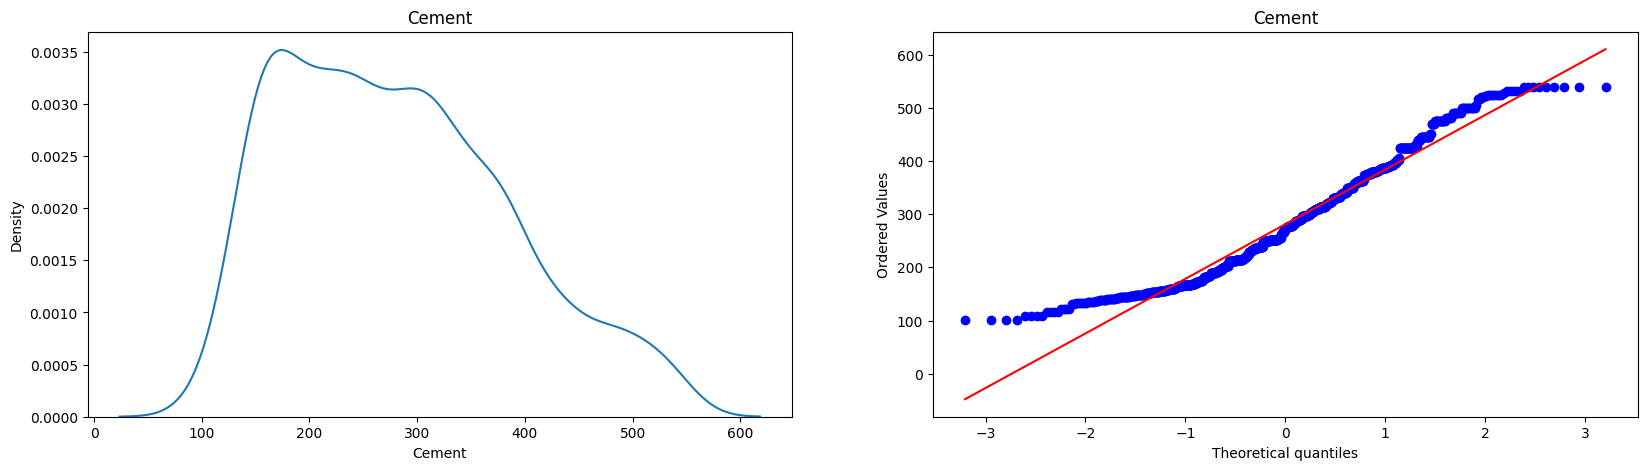

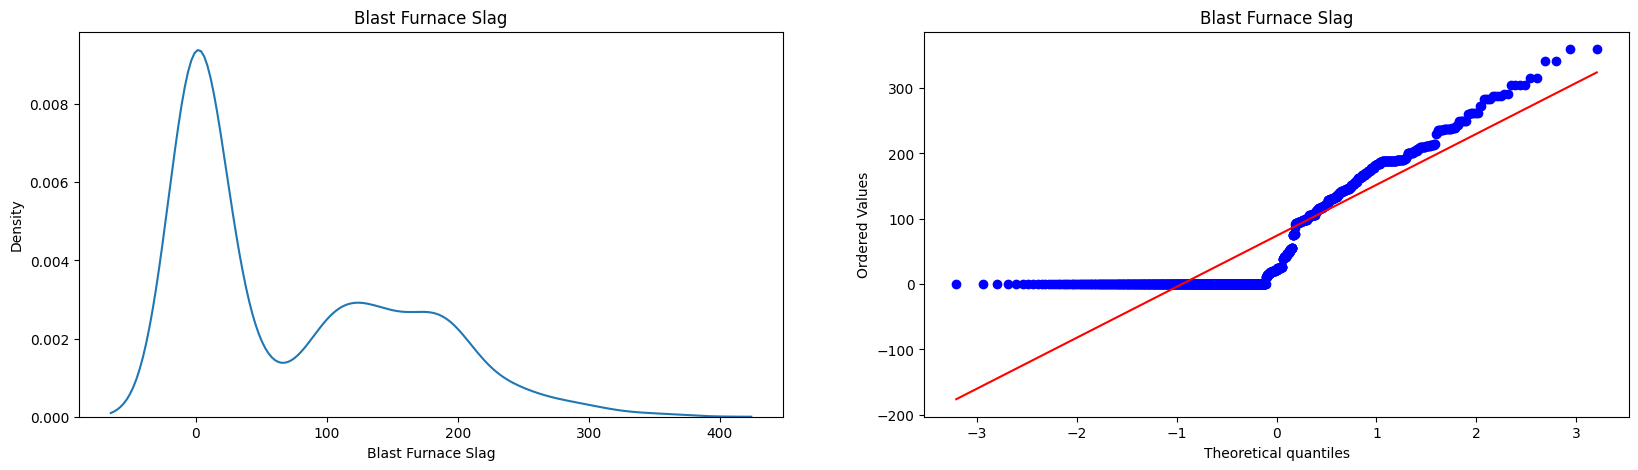

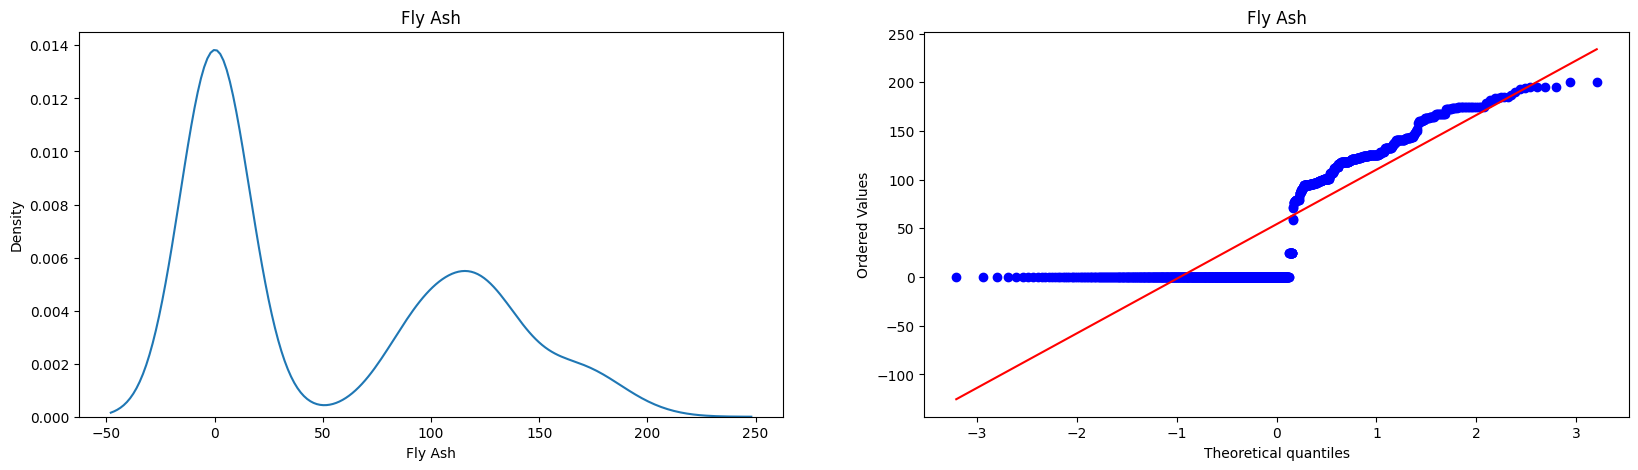

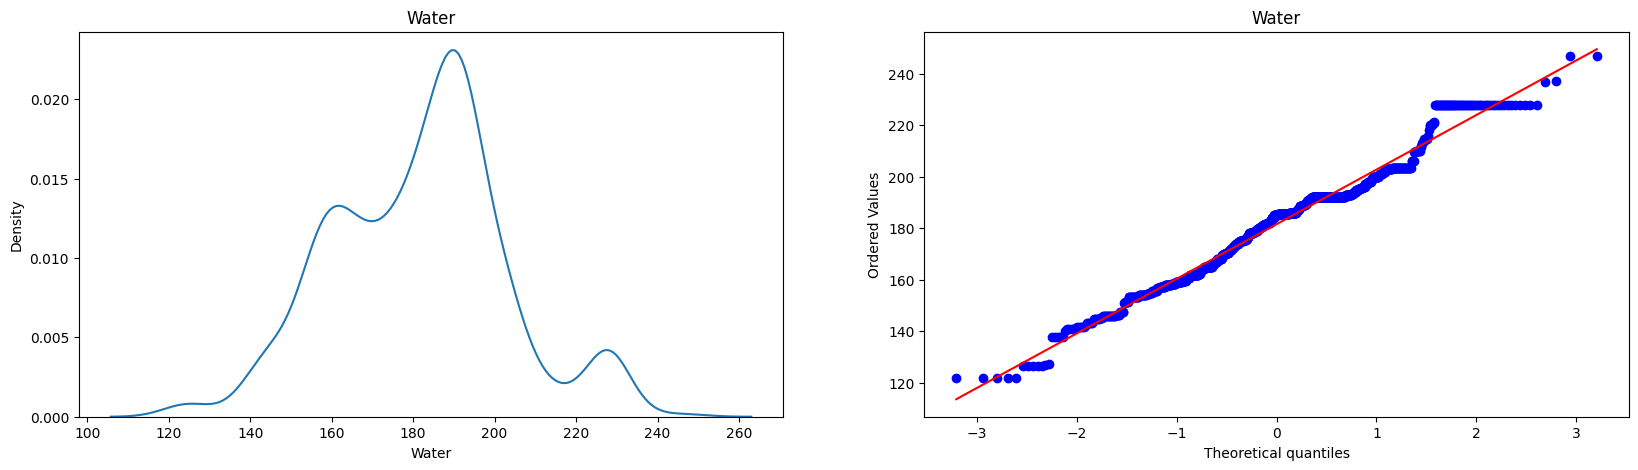

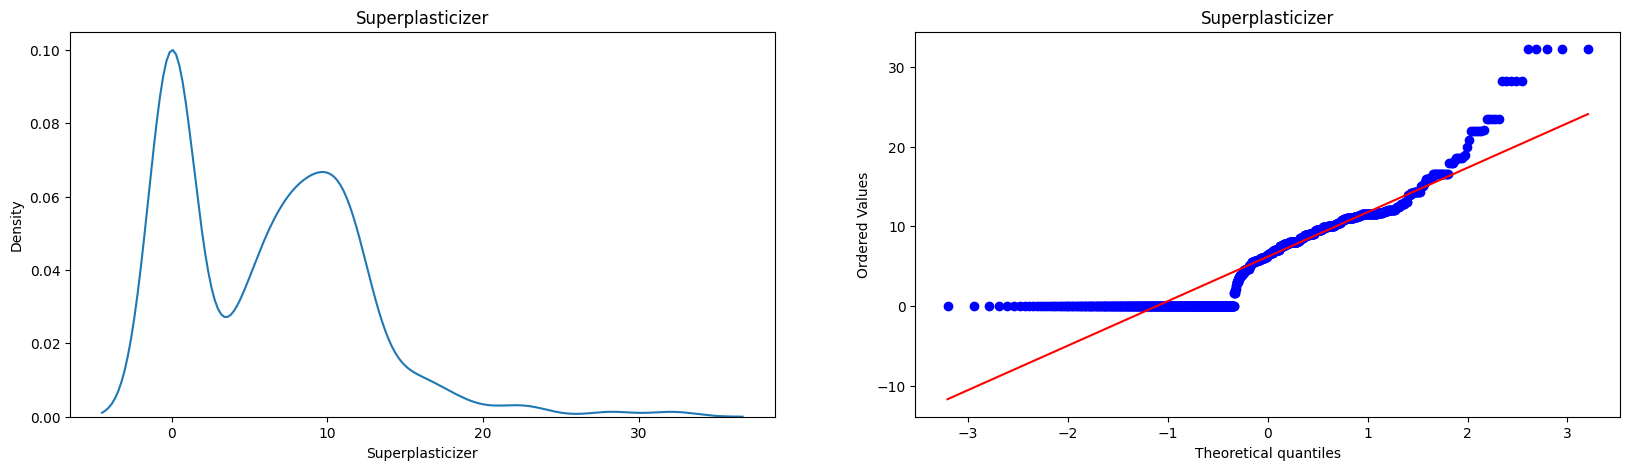

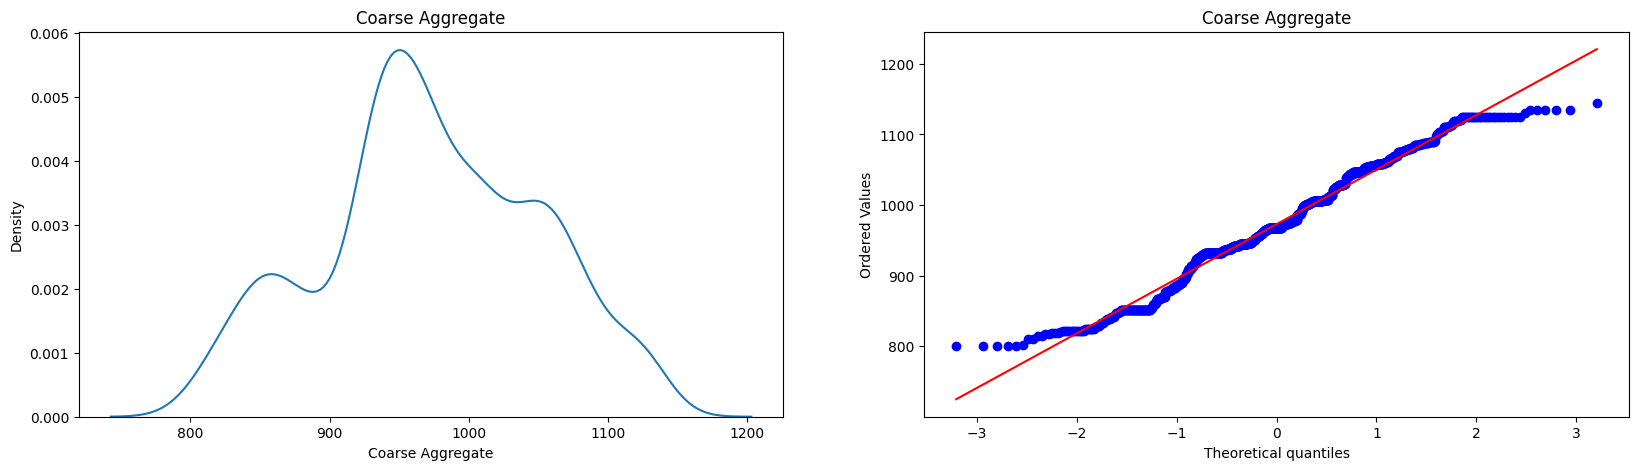

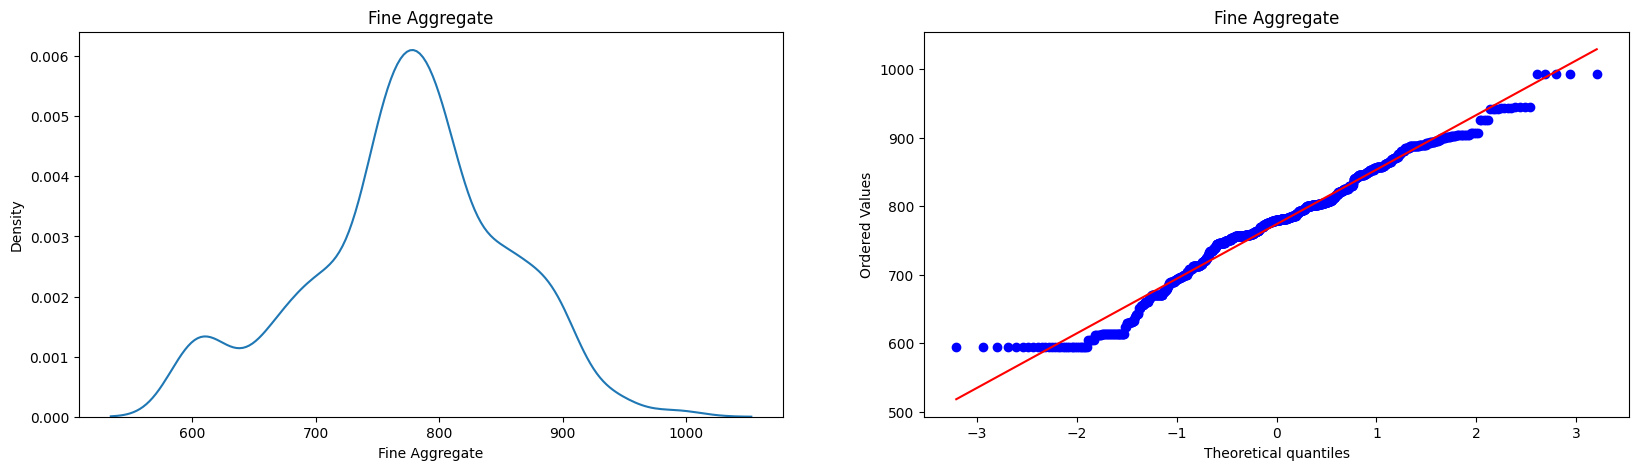

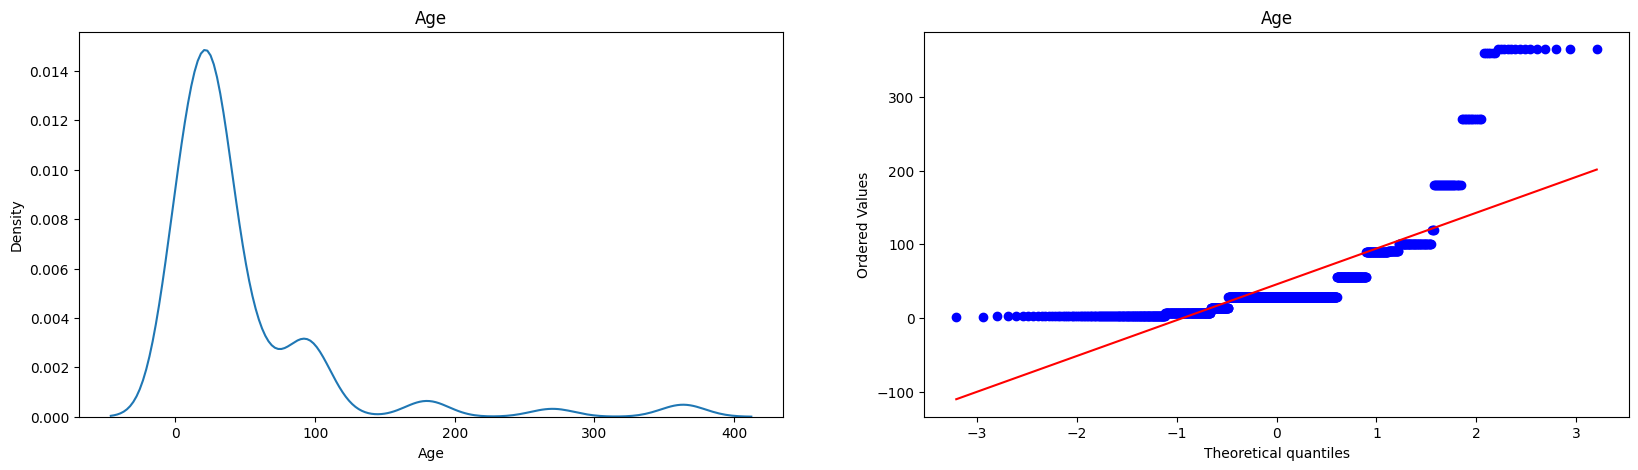

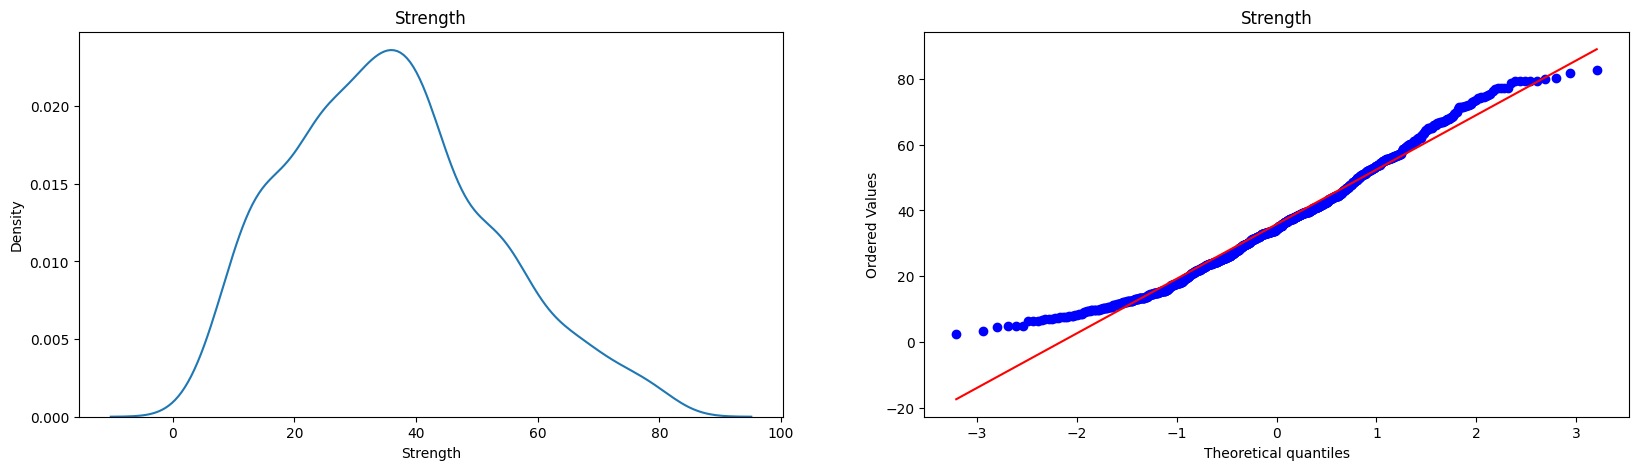

In [174]:
for i in df.columns:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.kdeplot(df[i])
    plt.title(f"{i}",)

    plt.subplot(122)
    st.probplot(df[i], plot=plt, dist='norm')
    plt.title(f"{i}")
    plt.show()

In [175]:
ptr = PowerTransformer(method='box-cox')

x_train_transformed = ptr.fit_transform(x_train+0.000001)
x_test_transformed = ptr.transform(x_test+0.000001)
x_transformed = ptr.transform(x+0.000001)

pd.DataFrame({'Columns':x_train.columns, 'lambda':ptr.lambdas_})

,Columns,lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [176]:
lr1 = LinearRegression()
lr1.fit(x_train_transformed, y_train)
y_pred1 = lr1.predict(x_test_transformed)

r2_score(y_test, y_pred1)

0.8047825005397713

In [177]:
np.mean(cross_val_score(lr1, x_transformed, y, scoring='r2')) 

0.6671879540850135